# CLUSTERING

This notebook aim to find and extract the best clusters from the data.
1. Use density_based algorithm (e.g. DBSCAN) to detect families groups with similar charatteristics.
2. Experiment with different similarity metrics or scale variables to optimize results.
3. View the clusters and interpret the results describing the main profiles.

In [1]:
import numpy as np
import pandas as pd

SEED=48

## IMPORT DATA

In [2]:
df = pd.read_csv("./Array_saved/X_without_null.csv").drop("Income", axis=1)

In [77]:
df.head()

,Gender,AutonomousCommunity,SchoolOwnership,KindOfPlace,LivingUnit,DependentPersons,WorkConfinement,WorkConfinementsSecondAdult,ChildEarlyEducation1,ChildEarlyEducation2,...,SpaceGym,SpaceOther,SpaceNone,SpaceStreet,SpacePlots,SpaceParks,SpacePublic,SpaceSurroundingOther,SpaceSurroundingNone,ActivitiesOutside
0,2.0,PAIS VASCO,Público,2.0,2,0,1,1.0,0,1,...,0,0,0,0,0,1,1,0,0,2.0
1,2.0,PAIS VASCO,Público,2.0,2,0,1,1.0,0,1,...,0,1,0,0,0,1,0,0,0,3.0
2,2.0,PAIS VASCO,Público,2.0,2,1,1,0.0,0,1,...,1,0,0,1,0,0,1,0,0,3.0
3,2.0,PAIS VASCO,Concertado,2.0,2,0,1,1.0,0,0,...,1,0,0,0,1,1,0,0,0,3.0
4,2.0,PAIS VASCO,Público,2.0,2,0,0,1.0,0,1,...,1,1,0,0,0,0,1,0,0,2.0


### Transform String columns to numeric

This process will need before, when I'll show the representative instance for each cluster

In [78]:
from sklearn.preprocessing import OrdinalEncoder

In [79]:
# The encoding is made in order with the mode
oe = OrdinalEncoder().fit(df.loc[:, ["AutonomousCommunity"]])
df.AutonomousCommunity = oe.transform(df.loc[:, ["AutonomousCommunity"]])

In [80]:
AutonomousCommunity_dict = {}

for key in range(0, len(oe.categories_[0])):
    AutonomousCommunity_dict[ key ] = oe.categories_[0][key]

AutonomousCommunity_dict

{0: 'ANDALUCÍA',
 1: 'ARAGÓN',
 2: 'ASTURIAS',
 3: 'CANARIAS',
 4: 'CANTABRIA',
 5: 'CASTILLA LA MANCHA',
 6: 'CASTILLA Y LEÓN',
 7: 'CATALUÑA',
 8: 'CEUTA',
 9: 'COMUNIDAD VALENCIANA',
 10: 'EXTREMADURA',
 11: 'GALICIA',
 12: 'ILLES BALEARS',
 13: 'LA RIOJA',
 14: 'MADRID',
 15: 'MELILLA',
 16: 'MURCIA',
 17: 'NAVARRA',
 18: 'PAIS VASCO'}

In [81]:
# The encoding is made in order with the mode
oe = OrdinalEncoder().fit(df.loc[:, ["SchoolOwnership"]])
df.SchoolOwnership = oe.transform(df.loc[:, ["SchoolOwnership"]])

In [82]:
SchoolOwnership_dict = {}

for key in range(0, len(oe.categories_[0])):
    SchoolOwnership_dict[ key ] = oe.categories_[0][key]

SchoolOwnership_dict

{0: 'Concertado', 1: 'Privado', 2: 'Público'}

### ENCODING

In [83]:
X_transformed = pd.read_csv("./Array_saved/X_embedded.csv")

In [84]:
X_transformed.head()

,ohe__Gender_1.0,ohe__Gender_2.0,ohe__AutonomousCommunity_0.0,ohe__AutonomousCommunity_1.0,ohe__AutonomousCommunity_2.0,ohe__AutonomousCommunity_3.0,ohe__AutonomousCommunity_4.0,ohe__AutonomousCommunity_5.0,ohe__AutonomousCommunity_6.0,ohe__AutonomousCommunity_7.0,...,remainder__ChildrenSchookwork,remainder__HelpOnline,remainder__SchoolCommunication,remainder__ParentsGroups,remainder__ParentsCommunicationReturn,remainder__PriorityCustody,remainder__PriorityContent,remainder__PriorityAutonomy,remainder__PrioritySocialisation,remainder__PriorityEmotional
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,2.0,3.0,2.0,1.0,3.0,3.0,2.0,2.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,2.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,3.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0


## Dimensionality Reduction

In [85]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
import umap

In [86]:
pca = PCA(n_components=2, random_state=SEED)
Kpca = KernelPCA(n_components=2, random_state=SEED, kernel='rbf', gamma=0.1)
tsne = TSNE(n_components=2, random_state=SEED)
reducer = umap.UMAP()

X_pca = pca.fit_transform(X_transformed)
X_Kpca = Kpca.fit_transform(X_transformed)
X_tsne = tsne.fit_transform(X_transformed)
X_umap = reducer.fit_transform(X_transformed)

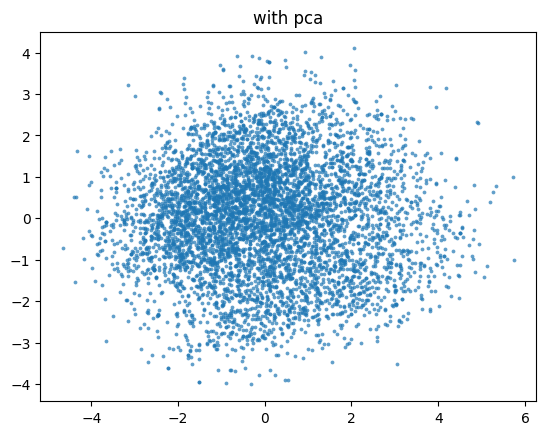

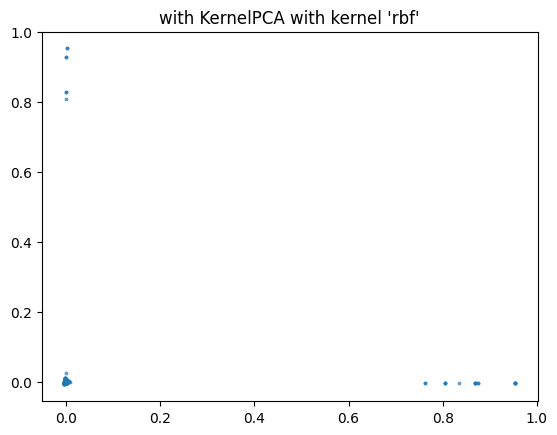

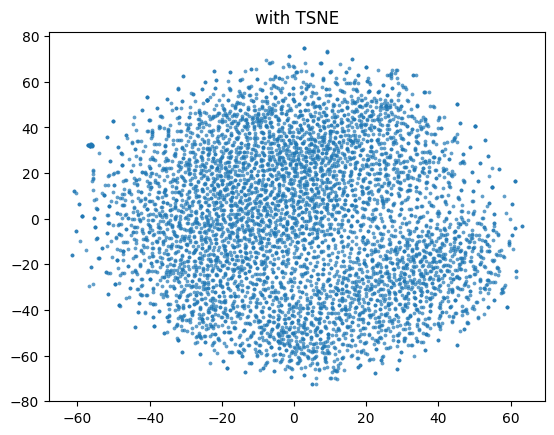

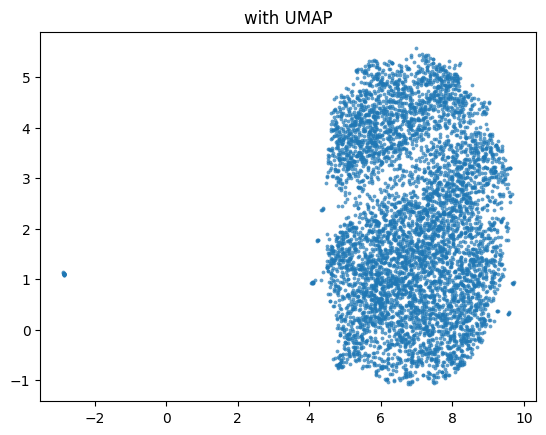

In [87]:
plt.figure(1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7)
plt.title("with pca")

plt.figure(2)
plt.scatter(X_Kpca[:, 0], X_Kpca[:, 1], marker=".", s=30, lw=0, alpha=0.7)
plt.title("with KernelPCA with kernel 'rbf'")

plt.figure(3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker=".", s=30, lw=0, alpha=0.7)
plt.title("with TSNE")

plt.figure(4)
plt.scatter(X_umap[:, 0], X_umap[:, 1], marker=".", s=30, lw=0, alpha=0.7)
plt.title("with UMAP")

plt.show()

## DBSCAN

In [88]:
import matplotlib.cm as cm

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [89]:
# WORKING AREA!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

def make_DBSCAN(X, X_decomp, eps=0.5, min_samples=5):

    db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=3).fit(X)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X[ labels!=-1 ], labels[ labels!=-1 ])

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    print("The average silhouette_score is: %f" % silhouette_avg)

    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters_+1) * 10])


    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)
    
    y_lower = 10
    for i in range(n_clusters_):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters_)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(labels.astype(float) / n_clusters_) # TODO: GLI OUTILER E IL CLUSTER 0 HANNO LO STESSO COLORE

    ax2.scatter(
        X_decomp[:, 0], X_decomp[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters_,
        fontsize=14,
        fontweight="bold",
    )

    

    plt.show()

In [90]:
def make_DBSCAN_(X, X_decomp, eps=0.5, min_samples=5):
    
    db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=3).fit(X)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    
    silhouette_avg = silhouette_score(X[ labels!=-1 ], labels[ labels!=-1 ])


    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    print("The average silhouette_score is: %f" % silhouette_avg)

    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = X_decomp[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=4,
        )

        xy = X_decomp[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=1,
        )

    plt.title(f"Estimated number of clusters: {n_clusters_}")
    plt.show()

    return labels, n_clusters_

### With PCA

Estimated number of clusters: 4
Estimated number of noise points: 3147
The average silhouette_score is: -0.118266


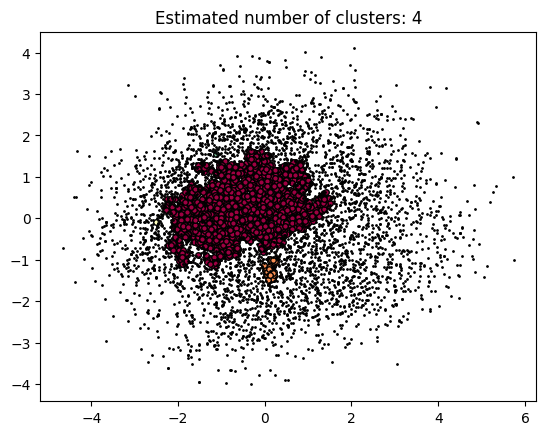

In [91]:
labels_pca, n_lables = make_DBSCAN_(X_pca, X_pca, eps=0.20, min_samples=34)

### With KernelPCA

Estimated number of clusters: 3
Estimated number of noise points: 0
The average silhouette_score is: 0.998261


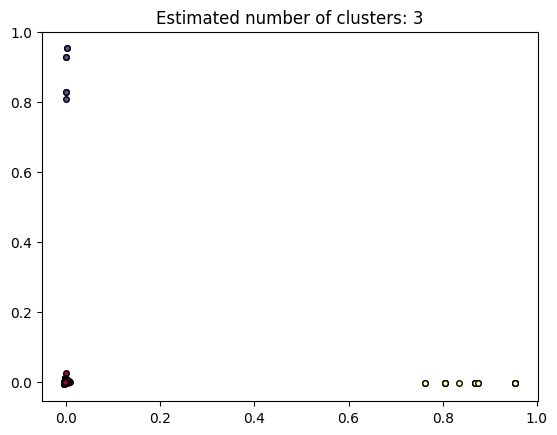

In [92]:
labels_Kpca, n_labels = make_DBSCAN_(X_Kpca, X_Kpca, eps=0.1, min_samples=2)

In [93]:
# Create a matrix where each rows rappresents an 
rappresentative_istance = np.ndarray( (n_labels, df.shape[1]) )

for i in range(0, n_labels ):
    # For each cluster take the mode instance
    rappresentative_istance[i, :] = df.loc[labels_Kpca==i, :].mode()

In [94]:
rappresentative_istance = pd.DataFrame(rappresentative_istance, columns=df.columns)
# Map the String values
rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)

rappresentative_istance

C:\Users\gabry\AppData\Local\Temp\ipykernel_13228\3393922528.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
C:\Users\gabry\AppData\Local\Temp\ipykernel_13228\3393922528.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Público' 'Público' 'Privado']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)


,Gender,AutonomousCommunity,SchoolOwnership,KindOfPlace,LivingUnit,DependentPersons,WorkConfinement,WorkConfinementsSecondAdult,ChildEarlyEducation1,ChildEarlyEducation2,...,SpaceGym,SpaceOther,SpaceNone,SpaceStreet,SpacePlots,SpaceParks,SpacePublic,SpaceSurroundingOther,SpaceSurroundingNone,ActivitiesOutside
0,2.0,COMUNIDAD VALENCIANA,Público,2.0,2.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
1,2.0,COMUNIDAD VALENCIANA,Público,0.0,2.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
2,2.0,COMUNIDAD VALENCIANA,Privado,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [95]:
# Show only the column with different values
mask_col_different = (rappresentative_istance.iloc[0, :] != rappresentative_istance.iloc[1, :]) | (rappresentative_istance.iloc[1, :] != rappresentative_istance.iloc[2, :])
rappresentative_istance.loc[:, mask_col_different]

,SchoolOwnership,KindOfPlace,WorkConfinement,ChildPrimaryEducation,WorkloadChange,Leisure,Friends,ExtendedFamily,Future,Sex,...,ChallengeOnline,PriorityCustody,PriorityContent,SchoolSpace,SpaceBarracks,SpaceDining,SpaceGym,SpacePublic,SpaceSurroundingNone,ActivitiesOutside
0,Público,2.0,1.0,0.0,3.0,2.0,2.0,3.0,3.0,3.0,...,0.0,3.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
1,Público,0.0,1.0,1.0,4.0,1.0,1.0,2.0,4.0,1.0,...,1.0,3.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0
2,Privado,1.0,0.0,1.0,7.0,1.0,2.0,4.0,3.0,1.0,...,1.0,2.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0


### With TSNE

Estimated number of clusters: 3
Estimated number of noise points: 2300
The average silhouette_score is: 0.356537


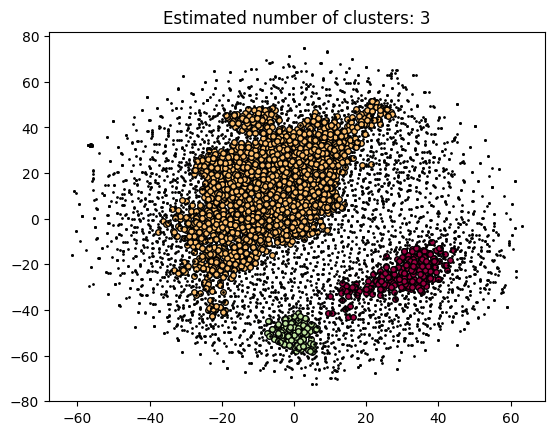

In [96]:
labels_tsne, n_labels = make_DBSCAN_(X_tsne, X_tsne, eps=4.8, min_samples=46)

In [97]:
# Create a matrix where each rows rappresents an 
rappresentative_istance = np.ndarray( (n_labels, df.shape[1]) )

for i in range(0, n_labels ):
    # For each cluster take the mode instance
    rappresentative_istance[i, :] = df.loc[labels_tsne==i, :].mode()

In [98]:
rappresentative_istance = pd.DataFrame(rappresentative_istance, columns=df.columns)
# Map the String values
rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)

rappresentative_istance

C:\Users\gabry\AppData\Local\Temp\ipykernel_13228\3393922528.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
C:\Users\gabry\AppData\Local\Temp\ipykernel_13228\3393922528.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Público' 'Público' 'Público']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)


,Gender,AutonomousCommunity,SchoolOwnership,KindOfPlace,LivingUnit,DependentPersons,WorkConfinement,WorkConfinementsSecondAdult,ChildEarlyEducation1,ChildEarlyEducation2,...,SpaceGym,SpaceOther,SpaceNone,SpaceStreet,SpacePlots,SpaceParks,SpacePublic,SpaceSurroundingOther,SpaceSurroundingNone,ActivitiesOutside
0,2.0,COMUNIDAD VALENCIANA,Público,2.0,2.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
1,2.0,COMUNIDAD VALENCIANA,Público,2.0,2.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
2,2.0,COMUNIDAD VALENCIANA,Público,2.0,2.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [99]:
# Show only the column with different values
mask_col_different = (rappresentative_istance.iloc[0, :] != rappresentative_istance.iloc[1, :]) | (rappresentative_istance.iloc[1, :] != rappresentative_istance.iloc[2, :])
rappresentative_istance.loc[:, mask_col_different]

,WorkConfinement,WorkloadChange,Sleep,Leisure,Sports,Friends,ExtendedFamily,Past,Sex,Reconciling,...,Anxiety,TechnologyUse,ChildPhysicalActivity,Irritability,Boredom,ChildMissTeacher,ChallengeAny,SpacePorch,SpaceGym,SpacePublic
0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,4.0,2.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,1.0,3.0,2.0,2.0,1.0,2.0,3.0,4.0,3.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,0.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### With UMAP

Estimated number of clusters: 2
Estimated number of noise points: 576
The average silhouette_score is: 0.422247


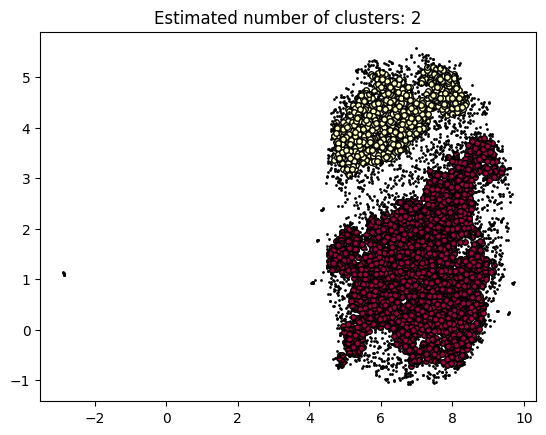

In [106]:
labels_umap, n_labels = make_DBSCAN_(X_umap, X_umap, eps=0.24, min_samples=36)

In [107]:
# Create a matrix where each rows rappresents an 
rappresentative_istance = np.ndarray( (n_labels, df.shape[1]) )

for i in range(0, n_labels ):
    # For each cluster take the mode instance
    rappresentative_istance[i, :] = df.loc[labels_umap==i, :].mode()

In [108]:
rappresentative_istance = pd.DataFrame(rappresentative_istance, columns=df.columns)
# Map the String values
rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)

rappresentative_istance

C:\Users\gabry\AppData\Local\Temp\ipykernel_13228\3393922528.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
C:\Users\gabry\AppData\Local\Temp\ipykernel_13228\3393922528.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Público' 'Público']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)


,Gender,AutonomousCommunity,SchoolOwnership,KindOfPlace,LivingUnit,DependentPersons,WorkConfinement,WorkConfinementsSecondAdult,ChildEarlyEducation1,ChildEarlyEducation2,...,SpaceGym,SpaceOther,SpaceNone,SpaceStreet,SpacePlots,SpaceParks,SpacePublic,SpaceSurroundingOther,SpaceSurroundingNone,ActivitiesOutside
0,2.0,COMUNIDAD VALENCIANA,Público,2.0,2.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
1,2.0,COMUNIDAD VALENCIANA,Público,2.0,2.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0


In [109]:
# Show only the column with different values
mask_col_different = (rappresentative_istance.iloc[0, :] != rappresentative_istance.iloc[1, :])
different_columns = rappresentative_istance.loc[:, mask_col_different]

In [110]:
different_columns

,WorkConfinement,WorkloadChange,ExtendedFamily,Reconciling,InterruptChildren,InterruptChildrenFrequency,Bedtime,Irritability,ChildMissTeacher
0,1.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0
1,0.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
for i in range(0, n_labels ):
    # For each cluster take the mode instance
    temp_df = df.loc[labels_umap==i, :]

    # Save the clustering results on disk
    temp_df.to_csv(f"./Clustering_results/UMAP_cluster{i+1}.csv", index=False)

How we can see, there are 3 kinds of family:
1. The ones where adults continue to go to work outside  
    They continue to work only for their family.

2. The ones where adults start to work at home and their workload has grown  
    They have reconciliation problems but they help their children by interrupting their job.